In [1]:
import numpy as np #importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv("/Sem_Data.csv") #uploading dataset
df.head() #by default it shows first five values

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df.info() #we can find datatype null value or not using info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
df.shape #cheacking shape

(100, 14)

In [6]:
df.dtypes #we can find datatype using dtypes command

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [7]:
df.describe() #we can find count ,mean ,std and some other statistical function using describe command

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [8]:
df.columns #we can find columns using columns command

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [9]:
df.isnull().sum() #checking null value or not

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [10]:
#there is no null value

In [12]:
df.duplicated().sum() #checking duplicated value

0

In [13]:
df['Ship Date']=pd.to_datetime(df['Ship Date']) #converting  Ship Date to yy-mm-dd format

In [14]:
df['Ship Date']

0    2010-06-27
1    2012-09-15
2    2014-05-08
3    2014-07-05
4    2013-02-06
        ...    
95   2011-09-03
96   2011-12-28
97   2016-06-29
98   2015-08-08
99   2012-02-15
Name: Ship Date, Length: 100, dtype: datetime64[ns]

In [15]:
df['Ship Date'].min() #finding first ship date

Timestamp('2010-02-25 00:00:00')

In [16]:
df['Ship Date'].max() #finding last ship date

Timestamp('2017-06-17 00:00:00')

In [17]:
df['Month']=df['Ship Date'].apply(lambda x: x.strftime('%m')) #month wise value
df['Month']

0     06
1     09
2     05
3     07
4     02
      ..
95    09
96    12
97    06
98    08
99    02
Name: Month, Length: 100, dtype: object

In [18]:
df['Year'] = df['Ship Date'].apply(lambda x: x.strftime('%Y'))
df['Year'] #year wise value

0     2010
1     2012
2     2014
3     2014
4     2013
      ... 
95    2011
96    2011
97    2016
98    2015
99    2012
Name: Year, Length: 100, dtype: object

In [19]:
df_trendM = df.groupby('Month').sum()['Total Revenue'].reset_index()

Text(0.5, 0, 'Month')

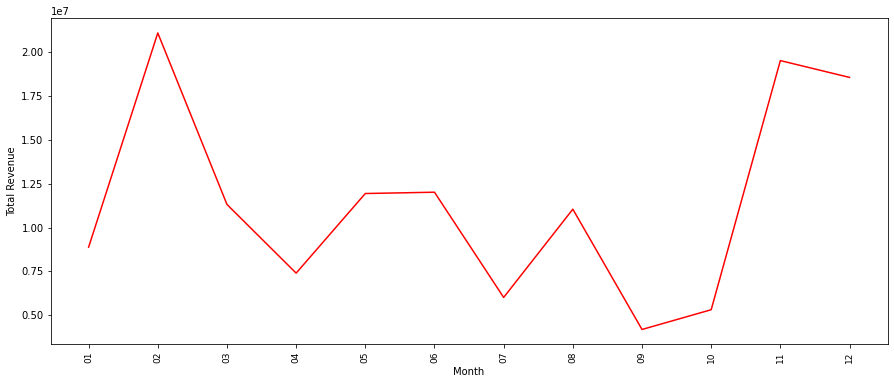

In [22]:
plt.figure(figsize=(15,6))
plt.plot(df_trendM['Month'],df_trendM['Total Revenue'],color = 'r')
plt.xticks(rotation='vertical',size=9) #plot month vs total revenue for finding sales trend
plt.ylabel('Total Revenue')
plt.xlabel('Month')

In [23]:
#we can say that from this plot The Total Revenue collection are highest at 2nd month i.e feb and
#Second heighest at 11th month i.e. November.

In [24]:
df['Year'] = df['Ship Date'].apply(lambda x: x.strftime('%Y'))
df['Year'] #year wise value

0     2010
1     2012
2     2014
3     2014
4     2013
      ... 
95    2011
96    2011
97    2016
98    2015
99    2012
Name: Year, Length: 100, dtype: object

In [25]:
df_trendY = df.groupby('Year').sum()['Total Revenue'].reset_index()

Text(0.5, 0, 'Year')

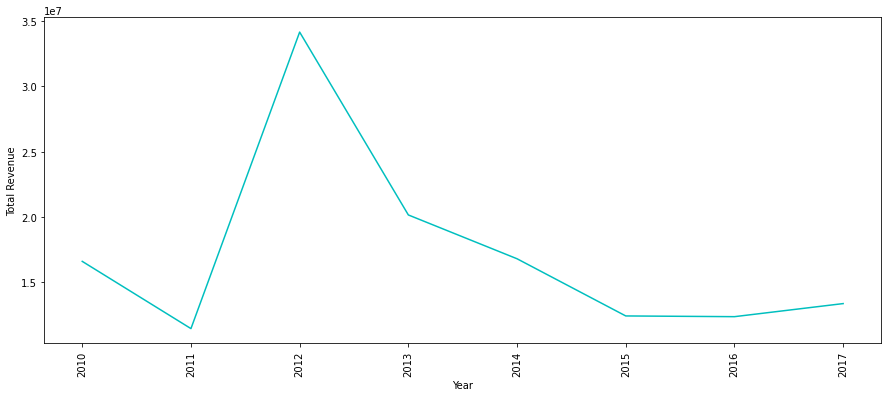

In [26]:
plt.figure(figsize=(15,6))
plt.plot(df_trendY['Year'],df_trendY['Total Revenue'],color = 'c')
plt.xticks(rotation='vertical',size=10)
plt.ylabel('Total Revenue')
plt.xlabel('Year') #plot total revenue vs year finding sales trend

In [27]:
#we can say that the Total Revenue collection was highest in 2012.

In [28]:
df['month_year'] = df['Ship Date'].apply(lambda x: x.strftime('%Y,%m'))
df['month_year']

0     2010,06
1     2012,09
2     2014,05
3     2014,07
4     2013,02
       ...   
95    2011,09
96    2011,12
97    2016,06
98    2015,08
99    2012,02
Name: month_year, Length: 100, dtype: object

In [29]:
df_trendMY = df.groupby('month_year').sum()['Total Revenue'].reset_index()

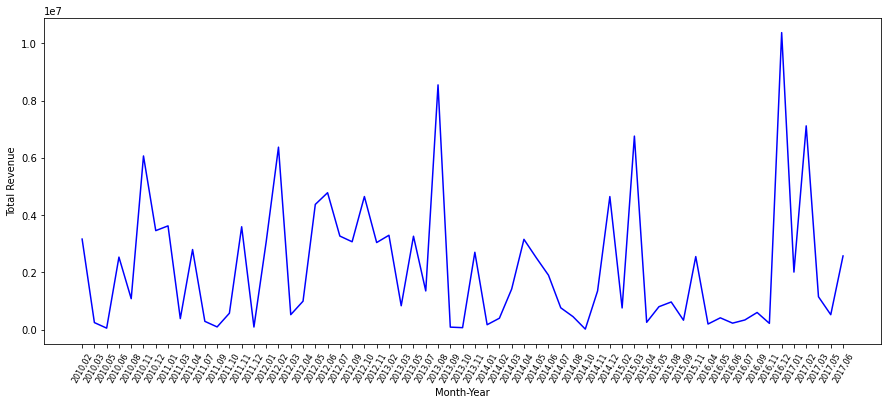

In [30]:
plt.figure(figsize=(15,6))
plt.plot(df_trendMY['month_year'],df_trendMY['Total Revenue'],color = 'b')
plt.xticks(rotation='vertical',size=8)
plt.ylabel('Total Revenue')
plt.xlabel('Month-Year')
plt.xticks(rotation=60) #plot total revenue vs month-year

plt.show()

In [31]:
#we can say that highest on December, 2016 while
#on August, 2013 it was second highest.

In [32]:
product_sales = pd.DataFrame(df.groupby('Item Type').sum()['Total Revenue']) #using this command we can find
#item type vs total revenue

In [33]:
product_sales.sort_values('Total Revenue',ascending=False)

,Total Revenue
Item Type,
Cosmetics,36601509.60
Office Supplies,30585380.07
Household,29889712.29
Baby Food,10350327.60
Clothes,7787292.80
Cereal,5322898.90
Meat,4503675.75
Personal Care,3980904.84
Vegetables,3089057.06


Text(0.5, 1.0, 'BAR PLOT SHOWING PRODUCT RANKING BY TOTAL REVENUE')

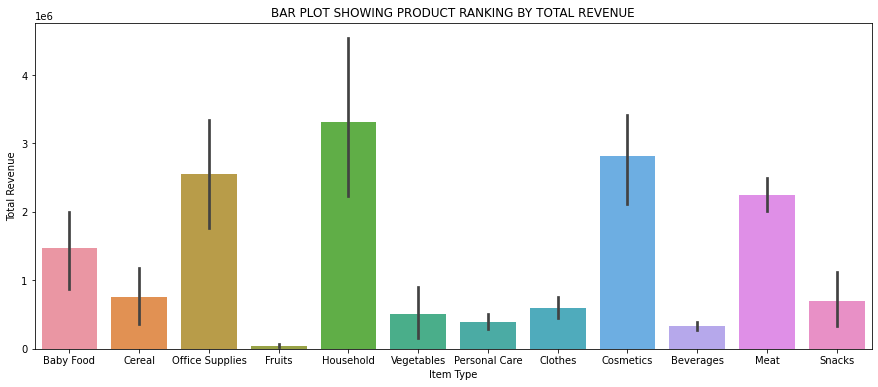

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(x='Item Type', y='Total Revenue',data=df)
plt.title("BAR PLOT SHOWING PRODUCT RANKING BY TOTAL REVENUE") #plot item type vs total revenue

In [35]:
product_sell = pd.DataFrame(df.groupby('Item Type').sum()['Units Sold'])

In [36]:
product_sell.sort_values('Units Sold' ,ascending = False) #item type vs units sold

,Units Sold
Item Type,
Cosmetics,83718
Clothes,71260
Beverages,56708
Fruits,49998
Personal Care,48708
Office Supplies,46967
Household,44727
Baby Food,40545
Cereal,25877


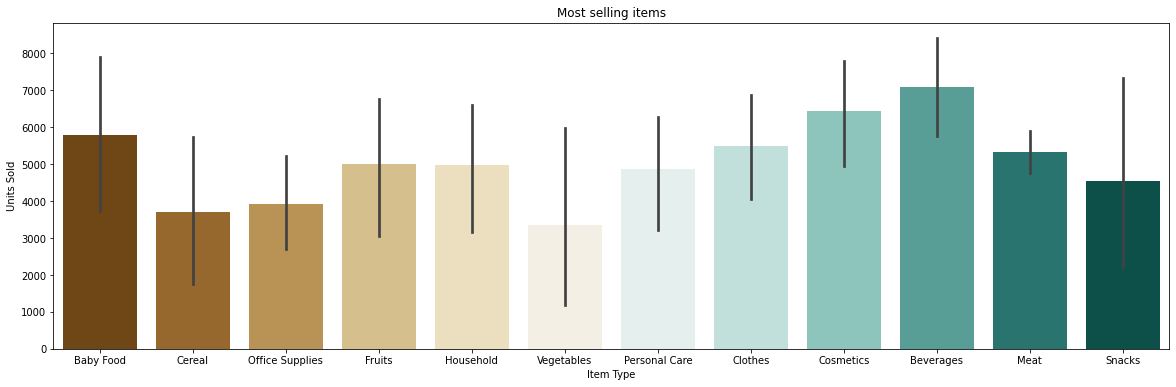

In [37]:
plt.figure(figsize=(20,6))
sns.barplot(x='Item Type', y='Units Sold',data=df,palette='BrBG')
plt.title('Most selling items')
plt.show() #using this plot we can find relation betwen item type and units sold

In [38]:
Item_profit = pd.DataFrame(df.groupby(['Item Type']).sum()['Total Profit'])
Item_profit.sort_values(['Item Type'],ascending = False)

,Total Profit
Item Type,
Vegetables,1265819.63
Snacks,751944.18
Personal Care,1220622.48
Office Supplies,5929583.75
Meat,610610.00
Household,7412605.71
Fruits,120495.18
Cosmetics,14556048.66
Clothes,5233334.40


Text(0.5, 1.0, 'Items with profit')

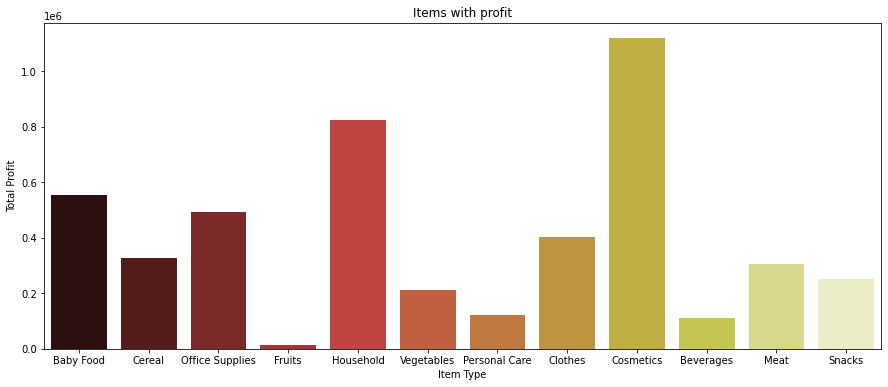

In [39]:
plt.figure(figsize=(15,6))
sns.barplot(x='Item Type', y='Total Profit',data=df,palette='hot', saturation=.5,ci=None)
plt.title("Items with profit") #same way ploting total profit vs item type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


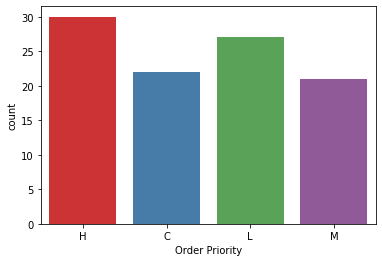

In [40]:
sns.countplot(df['Order Priority'],palette='Set1') #count of order priority

Text(0.5, 1.0, 'Revenue generated by priority')

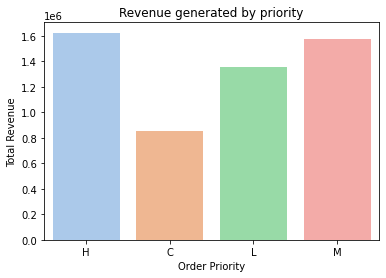

In [41]:
sns.barplot(x='Order Priority', y='Total Revenue',data=df,palette='pastel',ci=None)
plt.title('Revenue generated by priority') #plot order priority vs total revenue

Text(0.5, 1.0, 'items with profit')

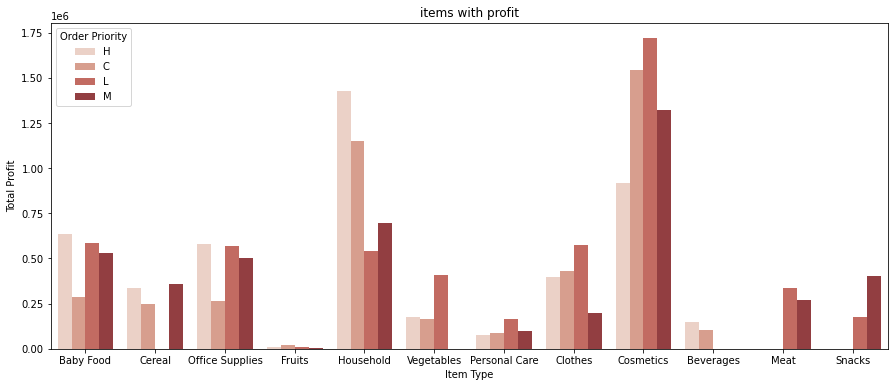

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(x='Item Type', y='Total Profit',data=df,palette='Reds', saturation=.5,ci=None,hue = 'Order Priority')
plt.title('items with profit') #Item Type Vs Total Profit on the basis of Order Priority

Text(0.5, 1.0, 'items with profit')

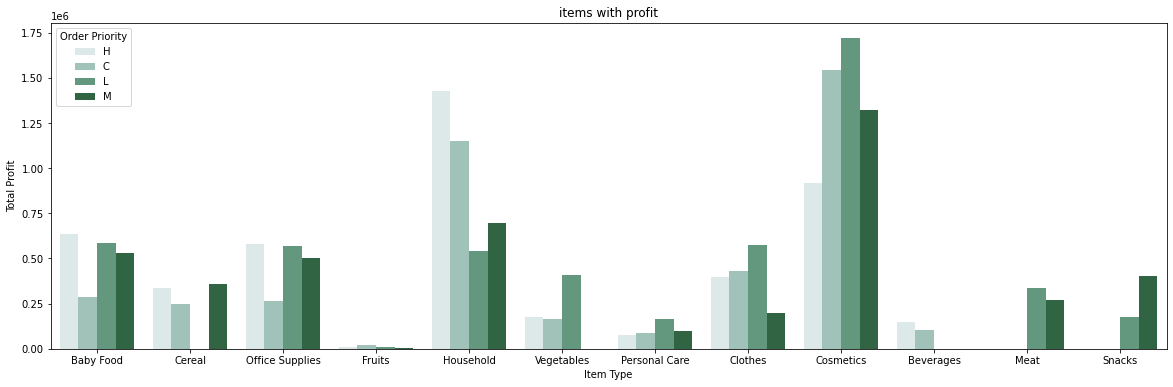

In [43]:
plt.figure(figsize=(20,6))
sns.barplot(x='Item Type', y='Total Profit',data=df,palette='BuGn', saturation=.5,ci=None,hue = 'Order Priority')
plt.title('items with profit') #Item Type Vs Total Revenue on the basis of Order Priority

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of offline and online sales')

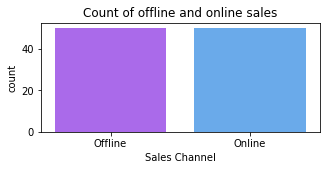

In [44]:
plt.figure(figsize=(5,2))
sns.countplot(df['Sales Channel'],palette='cool_r')
plt.title('Count of offline and online sales') #plot online vs offline sales

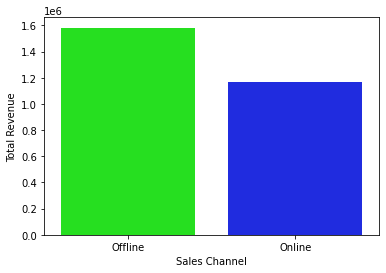

In [45]:
sns.barplot(x='Sales Channel' ,y='Total Revenue',data = df,ci=None,palette="hsv") #plot sales chanel vs total revenue

In [46]:
#conclusion : at last we can say that The number of online and offline orders are equal and 
#The Total Revenue of Offline sales is more than that of Online sales.